# 1. matplotlib graph
### 1.1 scatter
- scatter 함수 사용
- marker : scatter 모양지정

In [2]:
import numpy as np
import matplotlib.pyplot as plt

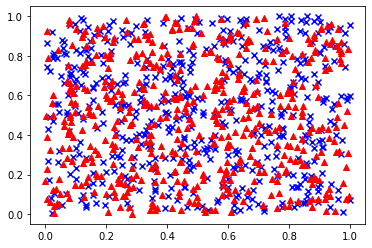

In [3]:
data_1 = np.random.rand(512, 2)
data_2 = np.random.rand(512, 2)

plt.scatter(data_1[:,0], data_1[:,1], c="b", marker = "x")
plt.scatter(data_2[:,0], data_2[:,1], c="r", marker = "^")

- s : 데이터의 크기를 지정
- 데이터 크기 비교 가능

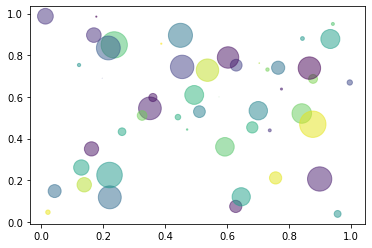

In [4]:
N = 50
# 데이터 50개
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N)) ** 2
plt.scatter(x, y, s=area, c=colors, alpha=0.5) # alpha : 투명도

In [11]:
# sequence형 data
len(x), len(y), len(area)

(50, 50, 50)

In [5]:
import pandas as pd
df = pd.read_csv("https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv")
df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [8]:
def parsedate(date_info) :
    import datetime

    return date_info[:9]
    
# 시간 data의 day만 추출
df["day"] = df["date"].map(parsedate)
df.head()

,index,date,duration,item,month,network,network_type,day
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,15/10/14
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,15/10/14
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,15/10/14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,15/10/14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,15/10/14


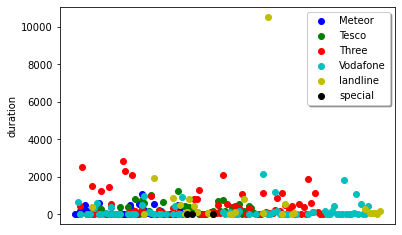

In [10]:
result = df.groupby(["network","day"])["duration"].sum().reset_index()
networks = result["network"].unique().tolist()
colors = ["b","g","r","c","m","y","k"]

# figure 반환
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for network_name, color in zip(networks, colors):
    if network_name == "data":
        continue
    
    # X : day / Y : duration
    X_1 = result[result["network"] == network_name]["day"]
    Y_1 = result[result["network"] == network_name]["duration"]

    ax.scatter(X_1, Y_1, c = color, label = network_name)
    ax.get_xaxis().set_visible(False)

ax.set_xlabel("day")
ax.set_ylabel("duration")

plt.legend(shadow = True, fancybox = True, loc="upper right")

### 1.2 bar chart
- bar 함수 사용

([<matplotlib.axis.XTick at 0x2267bced900>,
 [Text(0.25, 0, 'A'),
  Text(1.25, 0, 'B'),
  Text(2.25, 0, 'C'),
  Text(3.25, 0, 'D')])

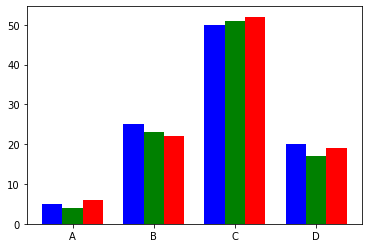

In [13]:
data = [[5.,25.,50.,20.],[4.,23.,51.,17],[6.,22.,52.,19]]

x = np.arange(4)

plt.bar(x + 0.00, data[0], color="b", width=0.25)
plt.bar(x + 0.25, data[1], color="g", width=0.25) # 첫번째 값 옆에 배치하기 위해서 +0.25 (폭)
plt.bar(x + 0.50, data[2], color="r", width=0.25)
plt.xticks(x+0.25, ("A","B","C","D"))

In [17]:
data =np.array([[5.,25.,50.,20.],[4.,23.,51.,17],[6.,22.,52.,19]])
color_list = ["b","g","r"]
data_label = ["A","B","C"]
x = np.arange(data.shape[1])
x


array([0, 1, 2, 3])

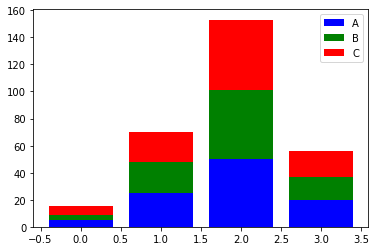

In [18]:
for i in range(data.shape[0]) :
    plt.bar(x, data[i], bottom= np.sum(data[:i], axis=0),
            color = color_list[i], label = data_label[i])

plt.legend()

<BarContainer object of 4 artists>

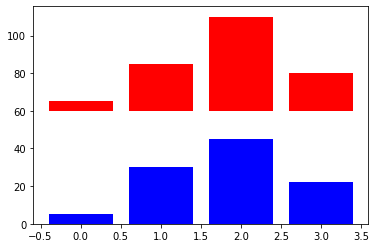

In [19]:
A = [5.0,30.0,45.0,22.0]
B = [5,25,50,20]

x = range(4) # x = 0,1,2,3

plt.bar(x,A,color="b")
plt.bar(x,B,color="r",bottom=60)

<BarContainer object of 4 artists>

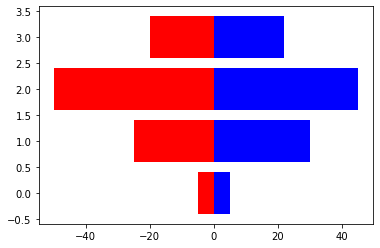

In [23]:
A = np.array([5,30,45,22])
B = np.array([5,25,50,20])
x = np.arange(4) # y축의 역할
plt.barh(x,A,color="b") # 오른쪽으로
plt.barh(x,-B,color="r") #왼쪽으로

### 1.3 histogram

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

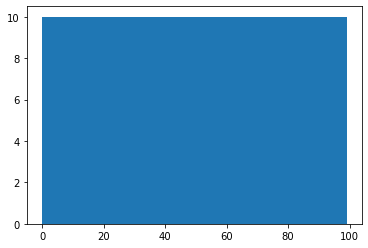

In [25]:
x =np.arange(100)
plt.hist(x, bins=10)

(array([  6.,  14.,  54., 140., 249., 265., 174.,  72.,  23.,   3.]),
 array([-351.23264103, -282.60590282, -213.9791646 , -145.35242639,
         -76.72568817,   -8.09894996,   60.52778826,  129.15452647,
         197.78126468,  266.4080029 ,  335.03474111]),
 <BarContainer object of 10 artists>)

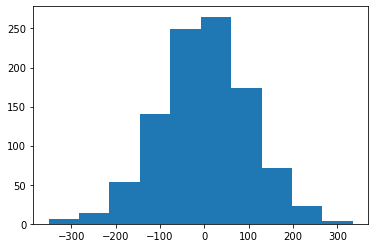

In [28]:
x =np.random.normal(0,100,1000)
plt.hist(x, bins=10) # bins : 막대 개수

### 1.4 `boxplot`

In [30]:
data # 2차원 list

array([[ 4.93334045e-04,  7.55068436e-01, -2.47818152e-01,
         8.85346998e-01, -8.33053449e-01],
       [ 9.09671061e-01,  2.95079357e-01,  6.36546682e-01,
        -6.91213668e-01,  1.11639694e+00],
       [-1.88869064e+00, -9.01127804e-01, -7.78835646e-01,
         2.53141978e-01,  6.58863273e-01],
       [ 1.14445871e+00, -2.23121045e+00, -1.40389290e+00,
        -2.37912991e+00, -5.39483362e-01],
       [-1.46089853e-01, -9.59230977e-01, -6.96311265e-02,
        -8.53225828e-01,  1.54638388e+00],
       [ 1.46592615e+00, -2.97989509e-01, -8.09269779e-01,
         9.14759057e-01,  7.35571296e-02],
       [-4.88647129e-01, -1.60037224e+00,  1.26389740e+00,
        -3.78719778e-02, -3.65391791e-01],
       [-1.41983312e+00,  9.27780098e-01,  8.27470871e-01,
        -1.78109293e-02, -3.07508442e+00],
       [-3.30215989e-01,  2.00273815e+00,  1.48209720e-01,
         1.03644852e-01, -5.15346845e-01],
       [ 2.15947828e+00,  1.57104148e+00,  2.69466360e-01,
         5.96500865e-01

In [31]:
data.shape

(100, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2267d164340>,
 'caps': [<matplotlib.lines.Line2D at 0x2267d1649a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2267d1640d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2267d164e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x2267d165150>,
 'means': []}

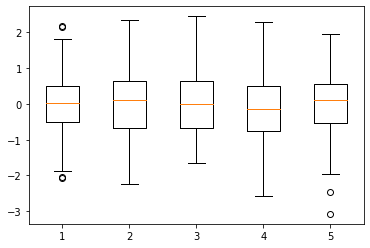

In [29]:
data = np.random.randn(100,5)
plt.boxplot(data)